# BPlus tree

B+ tree is a balanced tree data structure commonly used in computer science and databases for efficient indexing and searching. The main advantage of BPlus tree is that it is  useful for range queries where you need to retrieve a range of values, such as finding all records within a specific range of keys. The structure of B+ trees allows for efficient traversal of data in a sorted order, making range queries faster compared to other data structures.

### Structure and properties
- B+ tree is a self-balancing tree with a variable number of keys and pointers in each node.
- It has a hierarchical structure with a root node, internal nodes, and leaf nodes.
- Internal nodes store keys for indexing and pointers to child nodes.
- Leaf nodes store key-value pairs or records and are connected in a linked list for efficient range queries.
- All leaf nodes are at the same level, making traversal easier.

### Operation
- **Insertion**: Inserting a new key-value pair in a B+ tree has a time complexity of O(log N).

- **Search**   Seacrhing a new key-value pair in a B+ tree has a time complexity of O(log N).

- **Deleting** Deleting a new key-value pair in a B+ tree has a time complexity of O(log N).

- **Range search** Range search that commonly includes inequality predicate (<,>,!=), here in this case the worst case time complexity is O(nlogN).


##### Key and Values

**Key** : is a unique identifier or attribute that is used to sort and locate data within a B+ tree.

**Value**: A value is the actual data associated with a key in a B+ tree. It represents the payload or information that is being stored and indexed. A **Key** may contain one or many ***Values***.

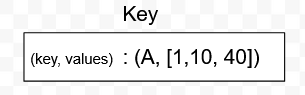

#### class key

**Initialization**: The **Key** class has **__init__** constructor that initializes a key object with a specified key and an optional value. If a **value** is provided, it is stored in a list called values. If no value is provided, the values list is initialized as an empty list.

**Key and Values**: The **Key** class provides methods to access and modify the **key** and **values**. The get_key method returns the key of the object, and the **set_key** method allows changing the key to a new value. The **get_values** method returns the list of values associated with the key, and the **set_values** method allows updating the list of values.


In [1]:
class Key:
    def __init__(self, key, value=None):
        self.key = key
        self.values = [value] if value is not None else []

    def get_key(self):
        return self.key

    def set_key(self, key):
        self.key = key

    def get_values(self):
        return self.values

    def set_values(self, values):
        self.values = values
#__str__ Method is just use for showing the output
    def __str__(self):
        return f"Key [key={self.key}, values={self.values}]"
    
    


### Node
A node is composed of either key values pair or seperately keys depends on the location of the node. Node is the fondamental component and entry point for the B Plus operation: 

Before Understanding the Node ***ORDER OF TREE*** is important to understand:
- A order of tree is represented by **M** and it is a integer;
- Tree construction is depending on the order of the tree;
- Order depicts that a **Node** may have **M-1** keys and **M** pointers. 

he nodes in a B+ tree are structured in a hierarchical manner. The root node is at the top of the hierarchy and is the entry point for accessing the tree's contents. Internal nodes reside between the root and the leaf nodes, providing the structure for efficient key-based navigation. Leaf nodes exist at the bottom level of the tree and store the actual data entries.

B Plus tree is composed of two important node structure :

- **Internal Node**: Only contain the key with value, moreover it also contains the data pointer:

- **Leaf Node** : It exist on bottom layer of tree, Leaf node also composed Key as well as values.


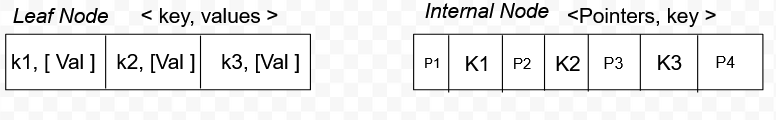

### class Node
class node has several attributes depending on its level, A node can only have one parent, however, **root** node or **internal node** may have more than one childerns.
- **keys**: keys are the **set** of data that single node holds, **leaf node** keys contains pair of **key and value** where as intermediate nodes or internal nodes have only **key** instance.
- **childern**: children is collection of type **Node**. A single intermediate **node** may have many nodes.Normally considers as **pointers** of node.
- **prev** and **next**: Each leaf node has address of **prev** and **next** node except **First** and **Last** node. These  **prev** and **Next** pointer is usually used for range findings.
- **parent**: It is also the self reference that hold it parent address.

Moreover, **getter** and **setter** is to use indiviual objects.

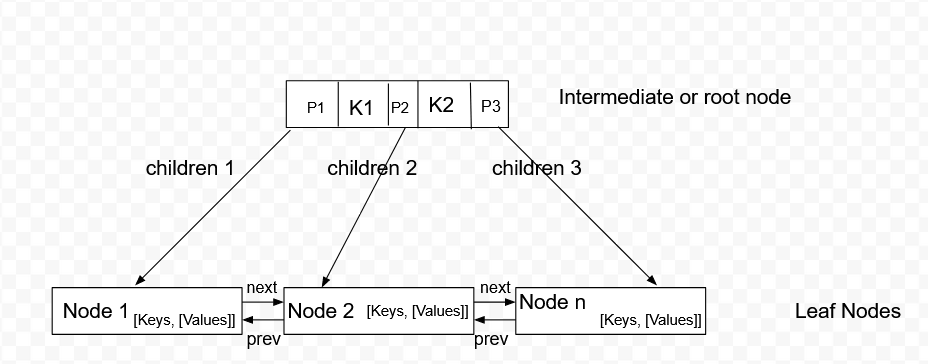

In [2]:
class Node:
    def __init__(self):
        self.keys = []
        self.children = []
        self.prev = None
        self.next = None
        self.parent = None

    def get_keys(self):
        return self.keys

    def set_keys(self, keys):
        self.keys = keys.copy()

    def get_children(self):
        return self.children

    def set_children(self, children):
        self.children = children

    def get_prev(self):
        return self.prev

    def set_prev(self, prev):
        self.prev = prev

    def get_next(self):
        return self.next

    def set_next(self, next):
        self.next = next

    def get_parent(self):
        return self.parent

    def set_parent(self, parent):
        self.parent = parent

    def __str__(self):
        return "Keys = " + str(self.keys)


### class BPlus Tree
- The class BPlus Tree utilizes the model (key, Node) to build a complete data structure.
- It contains several method and constructor such as order of tree, insertion, searching, removing, and range searching.
- Moreover, Node overflow (Number of keys exceeding the order of tree) split method is used that helps to split a single node into two nodes and create a parent node

**BPlusTree** class has constructor that initilize the order of tree and create object of Bplus tree;

#### Constructor
- Initialize the order of tree and create a initial root node with Null (empty)


In [3]:
def __init__(self, initialize):
        self.m = initialize
        self.root = None

### Insertion
Insertion starts looking the nodes from root to the appropriate leaf node, finds it location insertion;

Insertion has several cases d
- **root** is **Null**
- **root** is not **Null** but only one **Node** and **Node** has capacity to accomendate new keys.
- **Normal** insertion
- **Node splitting** 

Consider a example where the key, value both are same:

- the data set is = (2,2) (4,4) (7,7) (10,10) (17,17) (21,21) (28,28)
- The order of tree is 4
- Number of keys in a node is M-1
- One thing to node ***Tuple*** insertion is only possible at leaf node
 

### root is null
 The key is **2** with value **2**

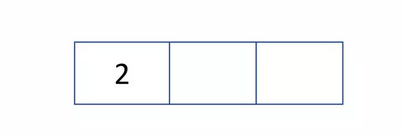

In [4]:
def insert(self, key, id):
    if self.root is None:
        new_node = Node()
        new_node.keys.append(Key(key, id))
        self.root = new_node
        self.root.parent = None
    

###  root is not Null but only one Node
- The key **4** and **7** need to be inserted in this case **Line 9 and 10**

    

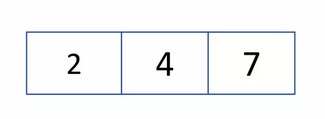

In [5]:
 def insert(self, key, id):
    # Root is null 
    if self.root is None:
        new_node = Node()
        new_node.keys.append(Key(key, id))
        self.root = new_node
        self.root.parent = None
    # Root is not null but only have one node with enough capacity
    elif len(self.root.children) == 0 and len(self.root.keys) < (self.m - 1):
            self.insert_within_external_node(key, id, self.root)

### Node over flow
#### first case
- Insert the key on the node;
- If size of **keys** overflows then 
- Split from m/2 into two
- create a new **Node** that holds all elments after m/2 
- create a parent node for both child node. 
- **line 13: self.insert_within_external_node(key, id, curr)**: For key 10 it should be [2, 4,7, 10]

#### second case
- If there exist many node then 
- Start from the root node and iterate to towards leaf node until the leaf node has no child
- Selection of nearset key for the queried **key** depends on the binary search on internal nodes.
- child pointer index is depending on the identified **key** location in the node. 
- Two cases when leaf node arrives
    - The identified node has capacity 
    - The identiied node over flow when newly tuple added in this case again split


- **Line 15:  self.split_external_node(curr, self.m)**: For key 10 it exceeds it limit then [ 2, 4, 7, 10] should split into 2 halves
- Its m/2= 4/2=2, second index position is 2, that moves as root node now and two halfs are [2,4] and [7,10] moreover 7 as root

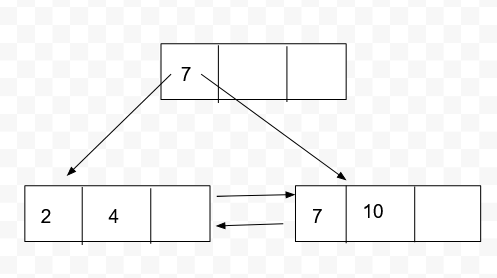

### Case: Key=17:
- **Line 11 to Line 13** shows the procedure for **Key** 17 insertion
- Start from root node ***Line10***
- Iterate toward respective leaf node.
- Finally insertion on found leaf node in a sorted way
- ***Line 12*** use **binary search** for efficient search for the index: 
     - start from root that only contains 7, the 17 is greater so choose right pointer for child node in this case **Binary Search** returns 1
     - new reference node is the right half node [7,10,].
     - in case if it is smaller like 3 then left node: IF CASE
     - right half node has not child node so iteration terminates.

In [6]:
def insert(self, key, id):
        if self.root is None:
            new_node = Node()
            new_node.keys.append(Key(key, id))
            self.root = new_node
            self.root.parent = None
        elif len(self.root.children) == 0 and len(self.root.keys) < (self.m - 1):
            self.insert_within_external_node(key, id, self.root)
        else:
            curr = self.root
            while len(curr.children) != 0:
                curr = curr.children[self.binary_search_within_internal_node(key, curr.keys)]
            self.insert_within_external_node(key, id, curr)
            if len(curr.keys) == self.m:
                self.split_external_node(curr, self.m)

### Details of methods used in insertion
   - ***insert_within_external_node***
   - ***binary_search_within_internal_node***
   - ***split_external_node***

### insert_within_external_node
   - **External Node** means leaf node
   - Search relavant key if key already present then update its values
   - Create a new key value pair on that instance.
   
This method takes two parameters one is the **key** that include **value** as well to be inserted and other is the identified **Node** where key needs to be inserted.
   - **Line 2** is binary search that and find the exact position for the **key** in the Identified node.
   - If **Node** already contains **key** then insert update its **value**
   - else create a new **key**, **value** pair in the identified node 

In [7]:
def insert_within_external_node(self, key, value, node):
        index_of_key = self.binary_search_within_internal_node(key, node.keys)
        try:
            if index_of_key != 0 and node.keys[index_of_key - 1].key == key:
                node.keys[index_of_key - 1].values.append(value)
            else:
                new_key = Key(key, value)
                node.keys.insert(index_of_key, new_key)
        except IndexError:
            print(index_of_key)

### binary_search_within_internal_node
   - Simple binary search on all **keys of node** and **key** to be searched:
   - If key found then return that index
   - Else it return relevant position of that key that can be examplified in upper case as **index = 1** when **key = 17** arrives one position greater than the key.

In [8]:
 def binary_search_within_internal_node(self, key, key_list):
        start = 0
        end = len(key_list) - 1
        index = -1
        if key < key_list[start].key:
            return 0
        if key >= key_list[end].key:
            return len(key_list)
        while start <= end:
            mid = (start + end) // 2

            if key < key_list[mid].key and key >= key_list[mid - 1].key:
                index = mid
                break
            elif key >= key_list[mid].key:
                start = mid + 1
            else:
                end = mid - 1
        return index

### split node
 In BPlus tree there are two types of split functions one is external node **Leaf Nodes** and internal nodes **Non-Leaf** node. In Bplus actual **Key Values** pairs exists so their should be explicit address of next leaf node and prev node. However, In internal node split we donot care about next and previous. Type of split functions 
 
   - split_external_node
   
   - split_internal_node
 
 First split is perfomed at **split_external_node** however, this split can also distrub the order of internal node so **split_internal_node** is performed finally adjust the next prev pointer of changed leaf node 

### Split external and internal nodes

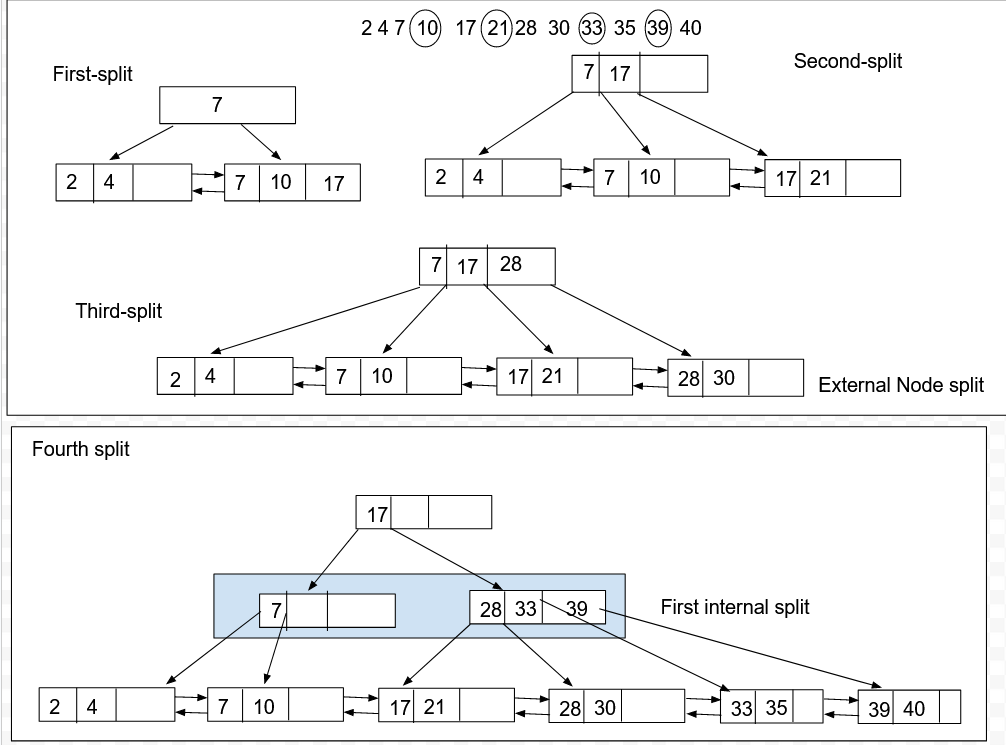

### External node split
   - **split_external_node** take two parameters **curr**: ****That indicate the found leaf node**** and **m** that ****depicts the order of tree****. In above case the **m** is **4**.
   - **mid_index** : 4//2 mean 2; means second index;
   - **Line 3 and Line 4** are the two instance of Node :**middle** means parent node; Initially we create a sperate parent for each split node, finally we merge the parent depends on the node capacity.
   - **right_part** holds the splited right half of the nodes. It is a leaf node so it start from **mid_index** to the end of node.
   - **Line 6** middle is set as parent of right half
   - **Line 7** add split key to the middle 
   - **Line 8** add one child for the middle node and it is the **right_part**
   - **Line 9** remove extra keys from **mid_index** to the end from current leaf node;
   - **Line 10** initiate the **split** flag 
    - **Line 11** check the **internal nodes**. 
   

In [9]:
def split_external_node(self, curr, m):
        mid_index = m // 2
        middle = Node()
        right_part = Node()
        right_part.keys = curr.keys[mid_index:]
        right_part.parent = middle
        middle.keys.append(Key(curr.keys[mid_index].key))
        middle.children.append(right_part)
        curr.keys = curr.keys[:mid_index]      
        first_split = True     
        self.split_internal_node(curr.parent, curr, m, middle, first_split)

### call: split_internal_node
In **Line 11** the split_internal_node  method is initiated **In [20]** that consider several question;
   - **Q1**: We set only the **right_part** parent however, the left part or current node **is None** 
   - **Q2**: If it is leaf node where is **prev** and **next** node of curr and prev.
   - **Q3**: Every split create a seperate, how we merge the parent node to become a single node.

### split_internal_node 
     * @param curr         the current Internal Node
     * @param prev         the child of the current Internal Node (Previous internal
     *                     node)
     * @param m            the degree of the B Plus Tree
     * @param  to_be_inserted the part split to be inserted to this internal Node
     * @param first_split   indicates if the split is happening at the first internal node
     *                     from the bottom


It consider two cases: First function call **self.split_internal_node(curr.parent, curr, m, middle, first_split)**
   - When the current node parent is **None** 
   - When it is not parent.
 #### Curr node parent is None:
  This means that current node is a leaf node, so it require appropriate **Next** and **Prev**
   - **Line 3 to Line 14** depicts that case;
   - **Line 3** check If the **curr.parent** is None;
   - **Line 4** Update **root** with newly created **Middle** that was parent of **right_half** of initial split.
   - **Line 5** For first input the **prev** is the **curr** node from function call; Apply Binary function in the parent node keys to find its appropriate pointer.
    - **Line 6** Add parent to the left half of already splited node
    - **Line 7** Update the childern node or pointer array of the parent Node.
#### Add prev and next nodes
    - from boolean flag we know the split is from leaf node:
    - check condition If the parent node return 0 for the first key of the prev node then
        - Then first index is the prev node for second index of parent node and vice versa.
    - check condition Else when the index_for_prev is not 0 then In this case just update the index for one greater and one smaller index.
        - child[index_for_prev+1].prev= child[index_for_prev]
        -child[index_for_prev-1].next= child[index_for_prev]


In a Nutshell Three tasks are performed: Ist update the left child node parent; From node parent insert child pointers for its childs, and update prev and next nodes. 

In [10]:
def split_internal_node(self, curr, prev, m, to_be_inserted, first_split):
       # print(curr)
        if curr is None:
            self.root = to_be_inserted
            index_for_prev = self.binary_search_within_internal_node(prev.keys[0].key, to_be_inserted.keys)
            prev.parent = to_be_inserted
            to_be_inserted.children.insert(index_for_prev, prev)
            if first_split:
                if index_for_prev == 0:
                    to_be_inserted.children[0].next = to_be_inserted.children[1]
                    to_be_inserted.children[1].prev = to_be_inserted.children[0]
                else:
                    to_be_inserted.children[index_for_prev + 1].prev = to_be_inserted.children[index_for_prev]
                    to_be_inserted.children[index_for_prev - 1].next = to_be_inserted.children[index_for_prev]
        else:
            self.merge_internal_nodes(to_be_inserted, curr)
            if len(curr.get_keys()) == m:
                mid_index = int(math.ceil(m / 2.0)) - 1
                middle = Node()
                right_part = Node()

                right_part.keys = curr.keys[mid_index + 1:]
                right_part.parent = middle

                middle.keys.append(curr.keys[mid_index])
                middle.children.append(right_part)

                children_of_curr = curr.children
                children_of_right = []

                last_child_of_left = len(children_of_curr) - 1

                for i in range(len(children_of_curr) - 1, -1, -1):
                    curr_keys_list = children_of_curr[i].keys
                    if middle.keys[0].key <= curr_keys_list[0].key:
                        children_of_curr[i].parent = right_part
                        children_of_right.insert(0, children_of_curr[i])
                        last_child_of_left -= 1
                    else:
                        break
                right_part.children = children_of_right
                curr.children[last_child_of_left + 1:] = []
                curr.keys[mid_index:] = []
                self.split_internal_node(curr.parent, curr, m, middle, False)

### curr node is not null 
**self.merge_internal_nodes(to_be_inserted, curr)** For every new split a new parent is created which finally merge using this method. This method takes two node merge from and merge into two nodes ***to_be_inserted*** new parent node and ***curr*** the previous parent Node; 
**merge_internal_nodes(self, merge_from, merge_into)** method
   - key_to_be_inserted = merge_from.keys[0] take first key that require to be merge
   - child_to_be_inserted = merge_from.children[0] take first Child that need to be merge
   
**Line 5** Apply binary search to find the location for key **merge_from**: **key_to_be_inserted** into the **merge_into** array.

**Line 6** Introduce a new variable that hold the ***child_insert_pos***.

**Line 8 and 9** Check IF key to be inserted [0] is less or equal to the first key of its childern then update the newly introduce variable with 1 increment.

 **Line 11** Set the parent for the first child of **merge_from** is **merge_into**.
 
**line 12** Update the **merge_into** node with updated childs; Add new child on Location **child_insert_pos** to child of **merge_from** that is  **child_to_be_inserted**.

**Line 13** **Insert** key from **merge_from** to **merge_into** into the binary searched location.

**Line 14** **Check Condition**: If **Merge_into** childs are the leaf node of BPlus Tree: Update the associated linked list prev and next node.

**First Condition**: If there is a child node next to the **childInsertPos** node that can be linked and if they are not already linked. If both conditions are satisfied, it establishes a bidirectional link by setting the **prev** pointer of the **next** node to point to the current node, and the next pointer of the current node to point to the next node.

**Second Condition**: If the childInsertPos node is not the first child and if the previous node is not already linked. If the conditions are met, it establishes a bidirectional link between the nodes by setting the prev pointer of the current node to the previous node and the next pointer of the previous node to the current node. This linking operation ensures proper connections between nodes in the data structure.

**Third Condition** This code snippet handles the case when the previous conditions are not met, meaning the current node needs to be inserted in between two existing nodes. In three lines:


    - The next pointer of the current node is set to the next pointer of the previous node.
    - The prev pointer of the node following the current node is set to the current node.
    - The next pointer of the previous node is set to the current node, and the prev pointer of the current node is set to the previous node.
    

These operations establish bidirectional links between the nodes, effectively inserting the current node into the correct position within the linked structure.
       


## Ist Merge
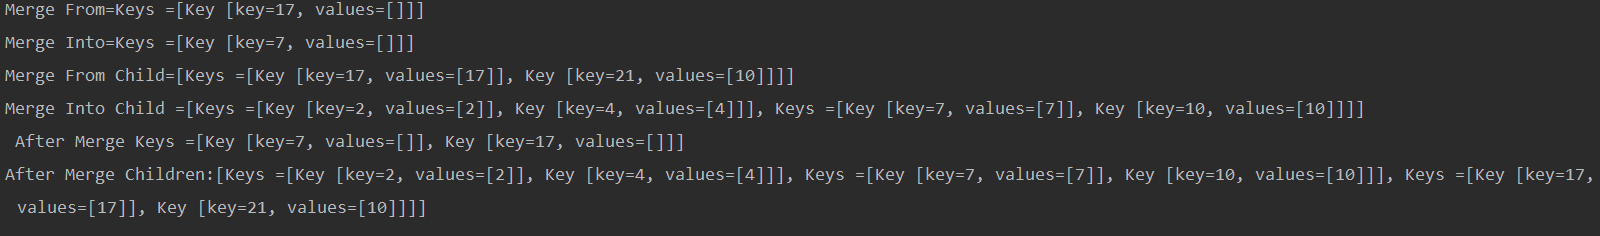

## 2nd Merge
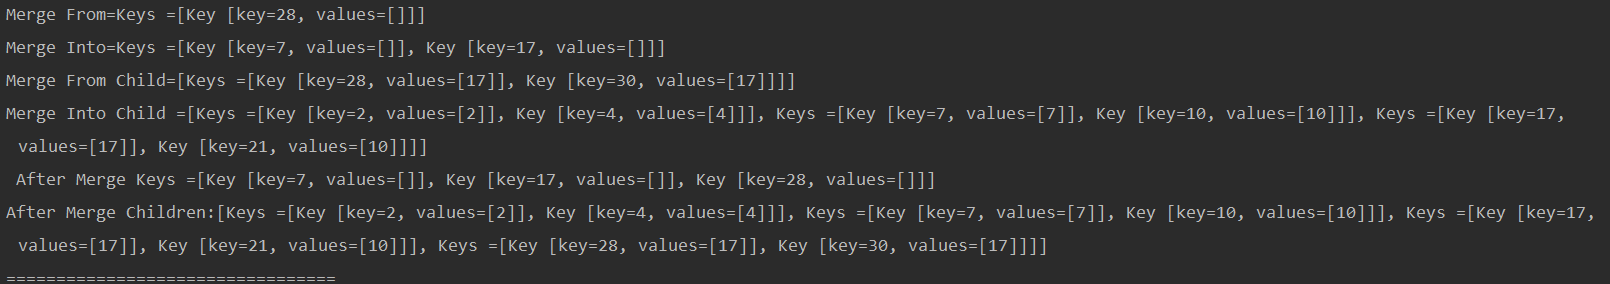

## 3rd Merge
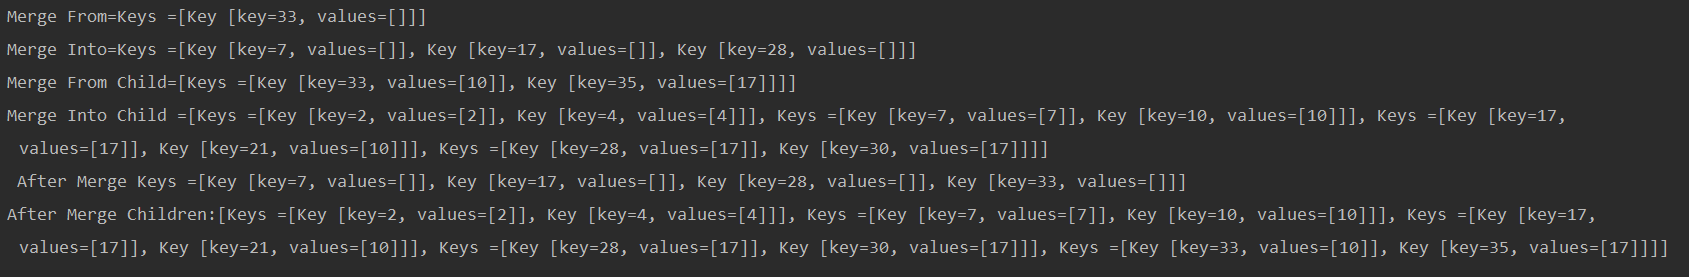

## 4th Merge
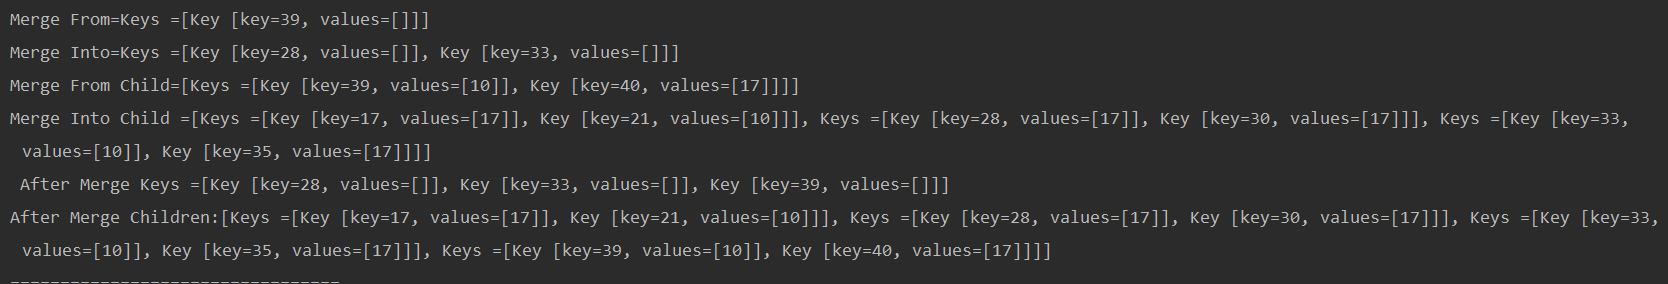

In [11]:
def merge_internal_nodes(self, merge_from, merge_into):
        key_to_be_inserted = merge_from.keys[0]
        child_to_be_inserted = merge_from.children[0]

        index_to_be_inserted_at = self.binary_search_within_internal_node(key_to_be_inserted.key, merge_into.keys)
        child_insert_pos = index_to_be_inserted_at

        if key_to_be_inserted.key <= child_to_be_inserted.keys[0].key:
            child_insert_pos = index_to_be_inserted_at + 1

        child_to_be_inserted.parent = merge_into
        merge_into.children.insert(child_insert_pos, child_to_be_inserted)
        merge_into.keys.insert(index_to_be_inserted_at, key_to_be_inserted)
        if merge_into.children and not merge_into.children[0].children:
            if len(merge_into.children)  - 1 != child_insert_pos and merge_into.children[child_insert_pos + 1].get_prev() == None:
                merge_into.children[child_insert_pos + 1].set_prev(merge_into.children[child_insert_pos])
                merge_into.children[child_insert_pos].set_next(merge_into.children[child_insert_pos + 1])
            elif 0 != child_insert_pos and merge_into.children[child_insert_pos - 1].get_next() == None:
                merge_into.children[child_insert_pos].set_prev(merge_into.children[child_insert_pos - 1])
                merge_into.children[child_insert_pos - 1].set_next(merge_into.children[child_insert_pos])
            else:
                merge_into.children[child_insert_pos].set_next(merge_into.children[child_insert_pos - 1].get_next())
                merge_into.children[child_insert_pos].get_next().set_prev(merge_into.children[child_insert_pos])
                merge_into.children[child_insert_pos - 1].set_next(merge_into.children[child_insert_pos])
                merge_into.children[child_insert_pos].set_prev(merge_into.children[child_insert_pos - 1])

ln [21] **line 17** to **line 44** 

This part is from the internal node split part.

From **Line 18 to Line 26** It applies similar procedure as splitting of external node spliting unless  it split the keys from  **mid_index = int(math.ceil(m / 2.0)) - 1** . Splitting at Math.ceil(m/2 - 1) ensures that the new node receiving the split keys has one fewer key than the original node. 

**Line 28,29, and 30** Initializes a list childrenOfCurr with the children of the current node curr. It also creates an empty list childrenOfRight to hold the children that will be sent to the right part after the split. lastChildOfLeft represents the index of the last child in the left part of the split. 

**Line 33 to Line 40**: A loop iterates through the children of the current node in reverse order. It checks if the key at the beginning of the middle node is less than or equal to the key at the beginning of the current child node. If the condition is true, it sets the parent of the current child node to rightPart, adds it to the childrenOfRight list at index 0 (to maintain the correct order), and decrements lastChildOfLeft. If the condition is false, it breaks out of the loop.

**Line 41** This line sets the children of the rightPart node to the childrenOfRight list.

**Line 42 and 43** Remove the excess children and keys from the curr node to form the left part after the split.
    subList() is used to get a sublist of elements from lastChildOfLeft + 1 to childrenOfCurr.size() - 1, and clear() removes those elements from the original list.Similarly, subList() is used to get a sublist of keys from midIndex to curr.getKeys().size() - 1, and clear() removes those keys from the original list. The process of **Line 33 to Line 40** is explained by Figure **Child Pointer** adjustment
    
    
 **Line 44** **self.split_internal_node(curr.parent, curr, m, middle, False)** A recursive function that process or handle the split keys in upper level of tree.


### Child pointer
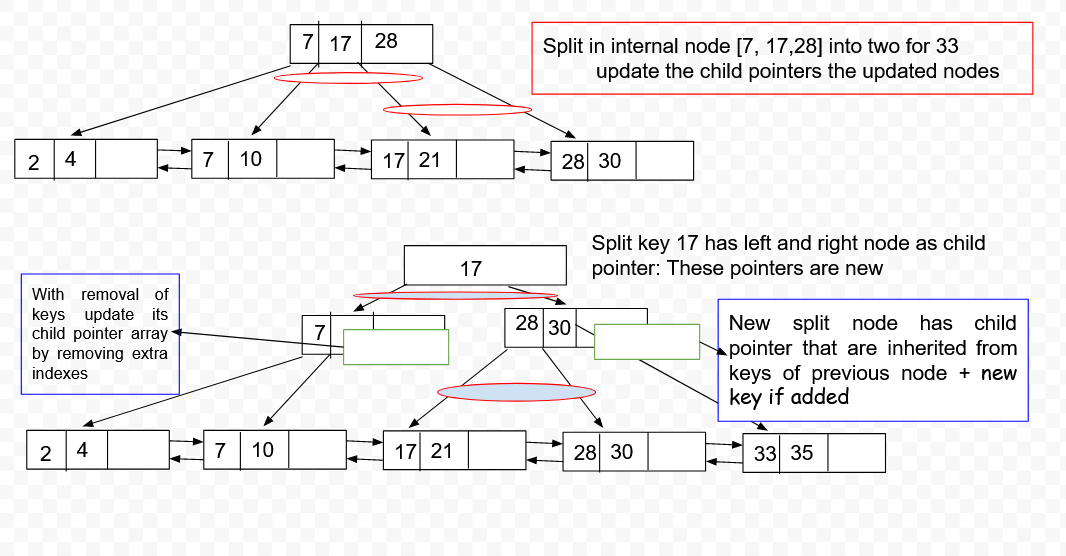

### Searching:
To search a key in a BPlus It follows same procedure as for finding a node for insertion. 
   - start from root node 
   - apply binary search on node that return relevant index for a key in the set of **keys** in a node
   - Iterate this process toward leaf node. 
   - Identified node contains the respective key or relevant key:
   - linear scan that node for searching key

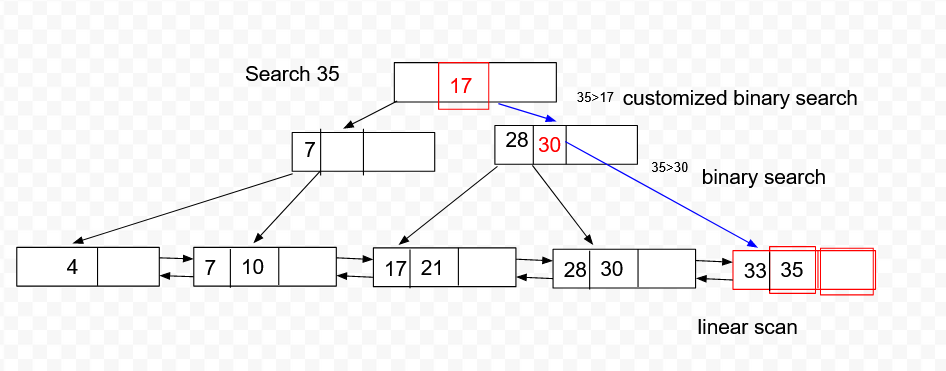

In [12]:
 def search(self, key):
        #search_values = []
        curr = self.root
        while curr.children:
            curr = curr.children[self.binary_search_within_internal_node(key, curr.keys)]
        keyList = curr.get_keys()
        found =False
        for item in keyList:   # Python's for loops are a "for each" loop 
            if item==key:
                print("Key found")
                found= True
                break
        if not found:
            print("Not key found")

                

### Range Search
Range search mean we have a collection and we search from start of the range to the end of range: Bplus tree provide helps for range search by just find the first key with O(log(n)) complexity and linearly search the key from start to the end of found key.


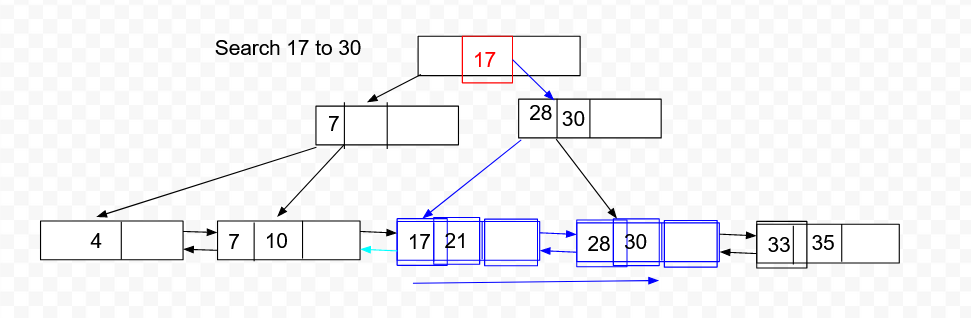

In [13]:
def searchRange(self,key1, key2):
        searchKeys = []
        currNode = self.root
    
        while len(currNode.get_children()) != 0:
            currNode = currNode.get_children()[self.binary_search_within_internal_node(key1, currNode.get_keys())]
    
        endSearch = False
        while currNode is not None and not endSearch:
            for i in range(len(currNode.get_keys())):
                if currNode.get_keys()[i].get_key() >= key1 and currNode.get_keys()[i].get_key() <= key2:
                    searchKeys.append(currNode.get_keys()[i].get_key())
                if currNode.get_keys()[i].get_key() > key2:
                    endSearch = True
            currNode = currNode.get_next()

        return searchKeys

### Greater  and Smaller than a specific Key
All Value greater then identified Key or smaller than a key Use **Next** and **Prev** methods
#### Greater
 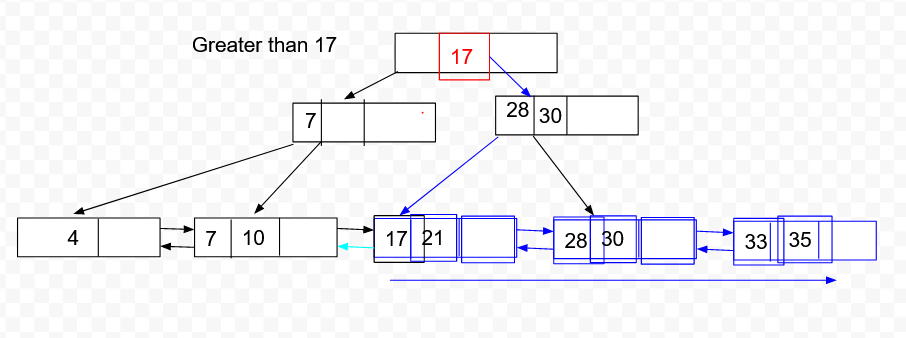

#### Smaller
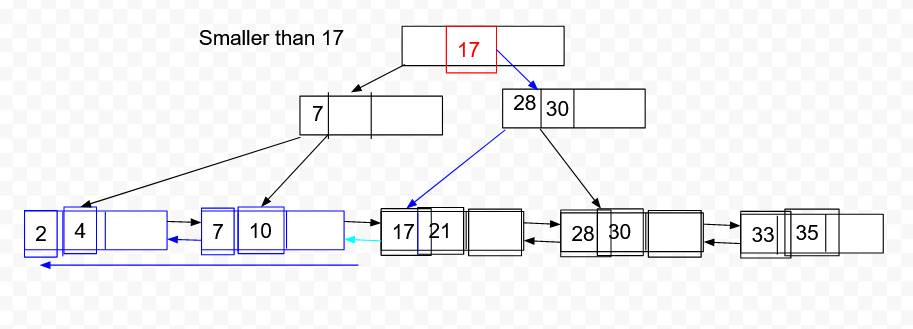

In [14]:
def searchGreater(self,key1):
        searchKeys = []
        currNode = self.root
    
        while len(currNode.get_children()) != 0:
            currNode = currNode.get_children()[self.binary_search_within_internal_node(key1, currNode.get_keys())]
    
        findSearch = False
        while currNode is not None:
            for i in range(len(currNode.get_keys())):
                if not findSearch:
                    if currNode.get_keys()[i].get_key() > key1:
                        searchKeys.append(currNode.get_keys()[i].get_key())
                        findSearch=True
                else:
                    searchKeys.append(currNode.get_keys()[i].get_key())
                   
            currNode = currNode.get_next()

        return searchKeys

In [15]:
def searchSmaller(self,key1):
        searchKeys = []
        currNode = self.root
    
        while len(currNode.get_children()) != 0:
            currNode = currNode.get_children()[self.binary_search_within_internal_node(key1, currNode.get_keys())]
    
        findSearch = False
        while currNode is not None:
            for i in range(len(currNode.get_keys())):
                if not findSearch:
                    if currNode.get_keys()[i].get_key() < key1:
                        searchKeys.append(currNode.get_keys()[i].get_key())
                        findSearch=True
                else:
                    searchKeys.append(currNode.get_keys()[i].get_key())
                   
            currNode = currNode.get_prev()

        return searchKeys
    

In [16]:
import math
class BPlusTree:

    def __init__(self, initialize):
        self.m = initialize
        self.root = None
    def insert(self, key, id):
        if self.root is None:
            new_node = Node()
            new_node.keys.append(Key(key, id))
            self.root = new_node
            self.root.parent = None
        elif len(self.root.children) == 0 and len(self.root.keys) < (self.m - 1):
            self.insert_within_external_node(key, id, self.root)
        else:
            curr = self.root
            while len(curr.children) != 0:
                curr = curr.children[self.binary_search_within_internal_node(key, curr.keys)]
            self.insert_within_external_node(key, id, curr)
            if len(curr.keys) == self.m:
                self.split_external_node(curr, self.m)

    def insert_within_external_node(self, key, id, node):
        index_of_key = self.binary_search_within_internal_node(key, node.keys)
        try:
            if index_of_key != 0 and node.keys[index_of_key - 1].key == key:
                node.keys[index_of_key - 1].values.append(id)
            else:
                new_key = Key(key, id)
                node.keys.insert(index_of_key, new_key)
        except IndexError:
            print(index_of_key)
    def split_external_node(self, curr, m):
        mid_index = m // 2
        middle = Node()
        right_part = Node()
        right_part.keys = curr.keys[mid_index:]
        right_part.parent = middle
        middle.keys.append(Key(curr.keys[mid_index].key))
        middle.children.append(right_part)
        curr.keys = curr.keys[:mid_index]      
        first_split = True     
        self.split_internal_node(curr.parent, curr, m, middle, first_split)
    def split_internal_node(self, curr, prev, m, to_be_inserted, first_split):
       # print(curr)
        if curr is None:
            self.root = to_be_inserted
            index_for_prev = self.binary_search_within_internal_node(prev.keys[0].key, to_be_inserted.keys)
            prev.parent = to_be_inserted
            to_be_inserted.children.insert(index_for_prev, prev)
            if first_split:
                if index_for_prev == 0:
                    to_be_inserted.children[0].next = to_be_inserted.children[1]
                    to_be_inserted.children[1].prev = to_be_inserted.children[0]
                else:
                    to_be_inserted.children[index_for_prev + 1].prev = to_be_inserted.children[index_for_prev]
                    to_be_inserted.children[index_for_prev - 1].next = to_be_inserted.children[index_for_prev]
        else:
            self.merge_internal_nodes(to_be_inserted, curr)
            if len(curr.get_keys()) == m:
                mid_index = int(math.ceil(m / 2.0)) - 1
                middle = Node()
                right_part = Node()

                right_part.keys = curr.keys[mid_index + 1:]
                right_part.parent = middle

                middle.keys.append(curr.keys[mid_index])
                middle.children.append(right_part)

                children_of_curr = curr.children
                children_of_right = []

                last_child_of_left = len(children_of_curr) - 1

                for i in range(len(children_of_curr) - 1, -1, -1):
                    curr_keys_list = children_of_curr[i].keys
                    if middle.keys[0].key <= curr_keys_list[0].key:
                        children_of_curr[i].parent = right_part
                        children_of_right.insert(0, children_of_curr[i])
                        last_child_of_left -= 1
                    else:
                        break
                right_part.children = children_of_right
                curr.children[last_child_of_left + 1:] = []
                curr.keys[mid_index:] = []
                self.split_internal_node(curr.parent, curr, m, middle, False)
    def merge_internal_nodes(self, merge_from, merge_into):
        key_to_be_inserted = merge_from.keys[0]
        child_to_be_inserted = merge_from.children[0]

        index_to_be_inserted_at = self.binary_search_within_internal_node(key_to_be_inserted.key, merge_into.keys)
        child_insert_pos = index_to_be_inserted_at

        if key_to_be_inserted.key <= child_to_be_inserted.keys[0].key:
            child_insert_pos = index_to_be_inserted_at + 1

        child_to_be_inserted.parent = merge_into
        merge_into.children.insert(child_insert_pos, child_to_be_inserted)
        merge_into.keys.insert(index_to_be_inserted_at, key_to_be_inserted)
        if merge_into.children and not merge_into.children[0].children:
            if len(merge_into.children)  - 1 != child_insert_pos and merge_into.children[child_insert_pos + 1].get_prev() == None:
                merge_into.children[child_insert_pos + 1].set_prev(merge_into.children[child_insert_pos])
                merge_into.children[child_insert_pos].set_next(merge_into.children[child_insert_pos + 1])
            elif 0 != child_insert_pos and merge_into.children[child_insert_pos - 1].get_next() == None:
                merge_into.children[child_insert_pos].set_prev(merge_into.children[child_insert_pos - 1])
                merge_into.children[child_insert_pos - 1].set_next(merge_into.children[child_insert_pos])
            else:
                merge_into.children[child_insert_pos].set_next(merge_into.children[child_insert_pos - 1].get_next())
                merge_into.children[child_insert_pos].get_next().set_prev(merge_into.children[child_insert_pos])
                merge_into.children[child_insert_pos - 1].set_next(merge_into.children[child_insert_pos])
                merge_into.children[child_insert_pos].set_prev(merge_into.children[child_insert_pos - 1])


    def binary_search_within_internal_node(self, key, key_list):
        start = 0
        end = len(key_list) - 1
        index = -1
        if key < key_list[start].key:
            return 0
        if key >= key_list[end].key:
            return len(key_list)
        while start <= end:
            mid = (start + end) // 2

            if key < key_list[mid].key and key >= key_list[mid - 1].key:
                index = mid
                break
            elif key >= key_list[mid].key:
                start = mid + 1
            else:
                end = mid - 1
        return index
    def search(self, key):
        #search_values = []
        curr = self.root
        while curr.children:
            curr = curr.children[self.binary_search_within_internal_node(key, curr.keys)]
        keyList = curr.get_keys()
        found = False
        for item in keyList:   # Python's for loops are a "for each" loop 
            if item.get_key() == key:
                print("Key found")
                found= True
                break
        if not found:
            print("Not key found")
    def searchRange(self,key1, key2):
        searchKeys = []
        currNode = self.root
    
        while len(currNode.get_children()) != 0:
            currNode = currNode.get_children()[self.binary_search_within_internal_node(key1, currNode.get_keys())]
    
        endSearch = False
        while currNode is not None and not endSearch:
            for i in range(len(currNode.get_keys())):
                if currNode.get_keys()[i].get_key() >= key1 and currNode.get_keys()[i].get_key() <= key2:
                    searchKeys.append(currNode.get_keys()[i].get_key())
                if currNode.get_keys()[i].get_key() > key2:
                    endSearch = True
            currNode = currNode.get_next()

        return searchKeys
    def searchGreater(self,key1):
        searchKeys = []
        currNode = self.root
    
        while len(currNode.get_children()) != 0:
            currNode = currNode.get_children()[self.binary_search_within_internal_node(key1, currNode.get_keys())]
    
        findSearch = False
        while currNode is not None:
            for i in range(len(currNode.get_keys())):
                if not findSearch:
                    if currNode.get_keys()[i].get_key() > key1:
                        searchKeys.append(currNode.get_keys()[i].get_key())
                        findSearch=True
                else:
                    searchKeys.append(currNode.get_keys()[i].get_key())
                   
            currNode = currNode.get_next()

        return searchKeys
    def searchSmaller(self,key1):
        searchKeys = []
        currNode = self.root
    
        while len(currNode.get_children()) != 0:
            currNode = currNode.get_children()[self.binary_search_within_internal_node(key1, currNode.get_keys())]
    
        findSearch = False
        while currNode is not None:
            for i in range(len(currNode.get_keys())):
                if not findSearch:
                    if currNode.get_keys()[i].get_key() < key1:
                        searchKeys.append(currNode.get_keys()[i].get_key())
                        findSearch=True
                else:
                    searchKeys.append(currNode.get_keys()[i].get_key())
                   
            currNode = currNode.get_prev()

        return searchKeys
    
    def remove(self, key):
    # Case 1: Empty tree
        
        if self.root is None:
            return

    # Case 2: Key is present in the root node
        if len(self.root.children) == 0 and any(k.key == key for k in self.root.keys):
            key_to_remove = next(k for k in self.root.keys if k.key == key)
            self.root.keys.remove(key_to_remove)
            return
        node = self.findNodeForKey2(key)
        found = False
        if node is not None:
            
            for k in node.keys:
                if k.key == key:
                    node.keys.remove(k)
                    found = True
                    break
            if not found:
                print("Not Found")
        # If the node becomes underflow after removing the key, perform redistribution or merging
            if len(node.keys) < (self.m - 1) // 2:
                self.handleUnderflow(node)
            return
    def findNodeForKey2(self, key):
        curr = self.root
        while len(curr.children) > 0:
            index = self.binarySearchWithinInternalNode2(key, curr.keys)
            curr = curr.children[index]
        return curr

    def handleUnderflow(self, node):
        if node == self.root:
        # Underflow in the root node is handled by checking the number of children
            if len(node.children) == 1:
                self.root = node.children[0]
                self.root.parent = None
            return
        parent = node.parent
        index = parent.children.index(node)

    # Try to borrow from the left sibling
        if index > 0 and len(parent.children[index - 1].keys) > (self.m - 1) // 2:
            leftSibling = parent.children[index - 1]
            borrowKey = leftSibling.keys.pop()
            node.keys.insert(0, borrowKey)
            if len(node.children) > 0:
                borrowChild = leftSibling.children.pop()
                borrowChild.parent = node
                node.children.insert(0, borrowChild)
            parent.keys[index - 1] = node.keys[0]
            return

    # Try to borrow from the right sibling
        if index < len(parent.children) - 1 and len(parent.children[index + 1].keys) > (self.m - 1) // 2:
            rightSibling = parent.children[index + 1]
            borrowKey = rightSibling.keys.pop(0)
            node.keys.append(borrowKey)
            if len(node.children) > 0:
                borrowChild = rightSibling.children.pop(0)
                borrowChild.parent = node
                node.children.append(borrowChild)
            parent.keys[index] = rightSibling.keys[0]
            return
        if index > 0:
            leftSibling = parent.children[index - 1]
            leftSibling.keys.extend(node.keys)
            if len(node.children) > 0:
                leftSibling.children.extend(node.children)
                for child in node.children:
                    child.parent = leftSibling
            parent.keys.pop(index - 1)
            parent.children.remove(node)

    # Merge with the right sibling
        else:
            rightSibling = parent.children[index + 1]
            node.keys.extend(rightSibling.keys)
            if len(rightSibling.children) > 0:
                node.children.extend(rightSibling.children)
                for child in rightSibling.children:
                    child.parent = node
            parent.keys.pop(index)
            parent.children.remove(rightSibling)
    # If the parent becomes underflow after merging, handle it recursively
        if len(parent.keys) < (self.m - 1) // 2:
            self.handleUnderflow(parent)
    def binarySearchWithinInternalNode2(self, key, keys):
        low = 0
        high = len(keys) - 1
        while low <= high:
            mid = low + (high - low) // 2
            if key == keys[mid].get_key():
                return mid + 1
            elif key < keys[mid].get_key():
                high = mid - 1
            else:
                low = mid + 1
        return l    

In [21]:
bplusTree= BPlusTree(4)
bplusTree.insert(3, 44)
bplusTree.insert(4, 45)
bplusTree.insert(6, 66)
bplusTree.search(6)

Key found


In [22]:

bplusTree.search(7)


Not key found


In [23]:
bplusTree.searchRange(3,6)

[3, 4, 6]

In [24]:
bplusTree.searchGreater(3)

[4, 6]

In [27]:
bplusTree.searchSmaller(6)

[3, 4]

In [25]:
bplusTree.remove(6)

In [26]:
bplusTree.search(6)

Not key found
